#1. Build Data Pipeline

##1.1 Install Dependencies and Setup



In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip.list

In [4]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

##1.2 Remove Dodgy Images

In [1]:
import cv2
import imghdr

In [2]:
data_dir = 'drive/MyDrive/Colab Notebooks/data'

In [3]:
image_extend = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
os.listdir(os.path.join(data_dir, 'happy'))

['154006829.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'getty_494581822_130796.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'GettyImages-565706549-949x534.jpg',
 'friends-happy-190821-800x450.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 '960x0.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '60632274._UY200_.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '1920px-face-smile.svg_.png.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '1902587.jpg',
 '170404-

In [6]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img: cv2.imread(image_path)
      tip: imghdr.what(image_path)
      if tip not in image_extend :
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

Issue with image drive/MyDrive/Colab Notebooks/data/sad/gettyimages-957787572.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/Crying-girl.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/crying-at-work.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/8iAb9k4aT.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/DD-blogpost-SAD-940x492.png
Issue with image drive/MyDrive/Colab Notebooks/data/sad/dark-depression-mood-people-wallpaper-preview.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/at-home-sad-sofa-300x200.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/b11b520b0818895ae5563d1e70294052.jpg
Issue with image drive/MyDrive/Colab Notebooks/data/sad/b2ap3_large_happy-sad-unsplash-850x575.jpg
Issue with image drive/MyDrive

##1.3 Load Data

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Building data pipeline
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Colab Notebooks/data')

Found 305 files belonging to 2 classes.


In [9]:
# Allow us to access data pipeline (loop through it)
data_iterator = data.as_numpy_iterator()

In [10]:
# Accessing the data pipeline itself (grab one batch)
# Can rerun to get another batch from iterator
batch = data_iterator.next()

In [11]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [12]:
# 0:happy or 1:sad
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

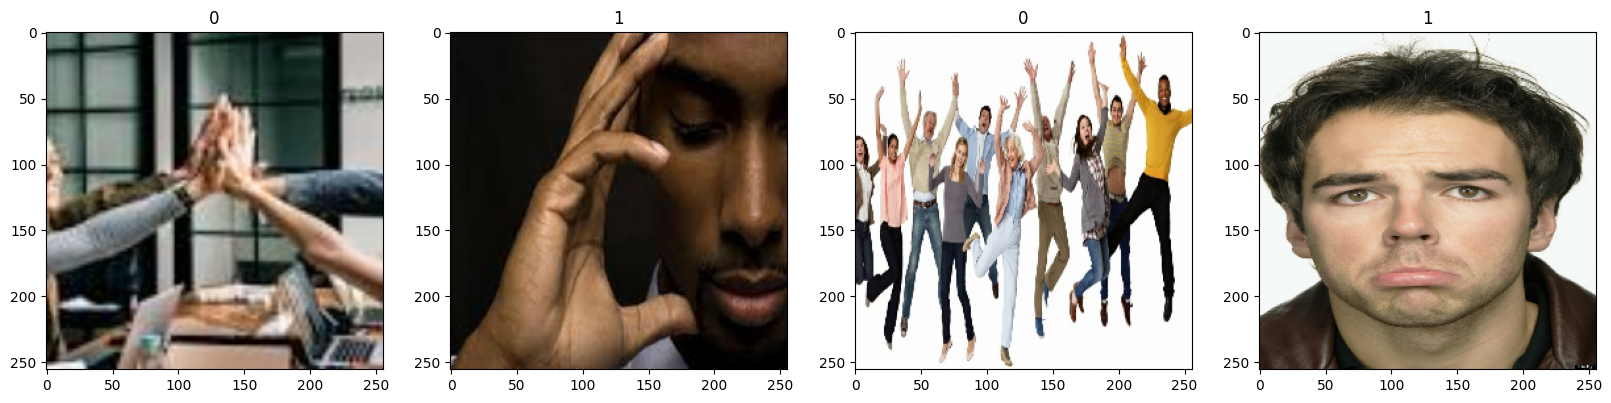

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#2. Preprocess Data

##2.1 Scale Data

In [14]:
# Re-establish data
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Colab Notebooks/data')

Found 305 files belonging to 2 classes.


In [15]:
# Apply particular transformation as data pre-process through data pipeline
# Pre-fetch data, it undergo transformation
data = data.map(lambda x, y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.5060279 , 0.568773  , 0.5256357 ],
          [0.51111364, 0.57385874, 0.5307215 ],
          [0.5252068 , 0.5879519 , 0.54481465],
          ...,
          [0.97356004, 0.96151197, 0.96106774],
          [0.9764706 , 0.9607843 , 0.9647059 ],
          [0.9764706 , 0.9607843 , 0.9647059 ]],
 
         [[0.5060279 , 0.568773  , 0.5256357 ],
          [0.5113635 , 0.5741086 , 0.53097135],
          [0.5270346 , 0.5897797 , 0.5466424 ],
          ...,
          [0.97173226, 0.95885134, 0.9588235 ],
          [0.9742264 , 0.95854014, 0.9624617 ],
          [0.9742264 , 0.95854014, 0.9624617 ]],
 
         [[0.50606966, 0.56881475, 0.5256775 ],
          [0.51255083, 0.5752959 , 0.5321587 ],
          [0.5284007 , 0.5911458 , 0.54800856],
          ...,
          [0.9694491 , 0.95594573, 0.9562291 ],
          [0.9714231 , 0.9557368 , 0.9596584 ],
          [0.9714231 , 0.9557368 , 0.9596584 ]],
 
         ...,
 
         [[0.7845881 , 0.6576356 , 0.5818962 ],
          [0.77766

##2.2 Split data

In [17]:
# 30 batch * each batch 32 img
len(data)

10

In [20]:
train_size = int(len(data)* .7)
# Evaluate model while training
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [21]:
# Make sure same
train_size + val_size + test_size

10

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

#3. Deep Model

##3.1 Build Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
# num_filters, size_filters, stride
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

##3.2 Train

In [28]:
logdir = 'drive/MyDrive/Colab Notebooks/logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 1.0881 - accuracy: 0.5000 - val_loss: 0.6527 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 27s 3s/step - loss: 0.6761 - accuracy: 0.5089 - val_loss: 0.6297 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.6218 - accuracy: 0.6875 - val_loss: 0.5892 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 26s 3s/step - loss: 0.5107 - accuracy: 0.7723 - val_loss: 0.4303 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.4103 - accuracy: 0.8393 - val_loss: 0.2862 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.3814 - accuracy: 0.8393 - val_loss: 0.3668 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 22s 3s/step - loss: 0.3006 - accuracy: 0.8973 - val_loss: 0.1956 - val_accuracy: 1.0000
Epoch 8/20
7/7 [==================

##3.3 Plot Performance

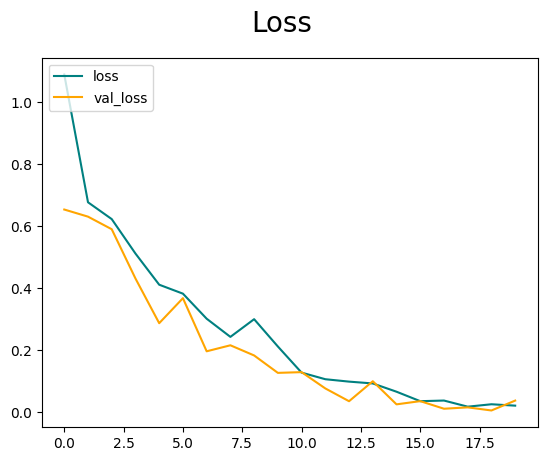

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

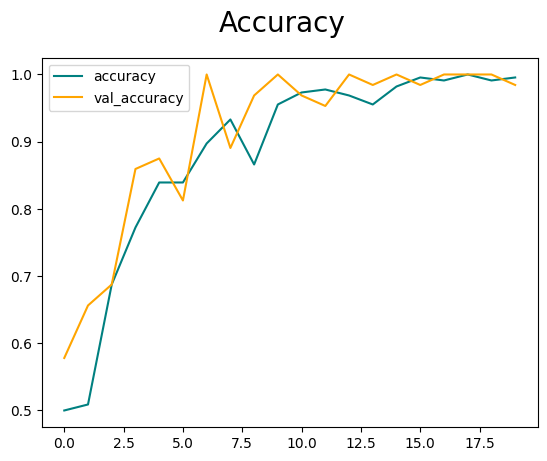

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#4. Evaluating Performance

##4.1 Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
len(test)

1

In [36]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 432ms/step


In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


##4.2 Test

In [ ]:
import cv2

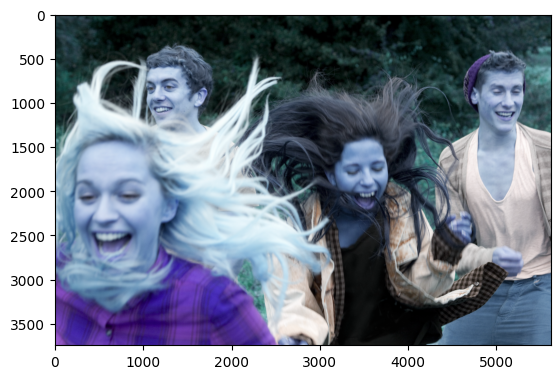

In [39]:
img = cv2.imread('drive/MyDrive/Colab Notebooks/data/test/happytest.jpg')
plt.imshow(img)
plt.show()

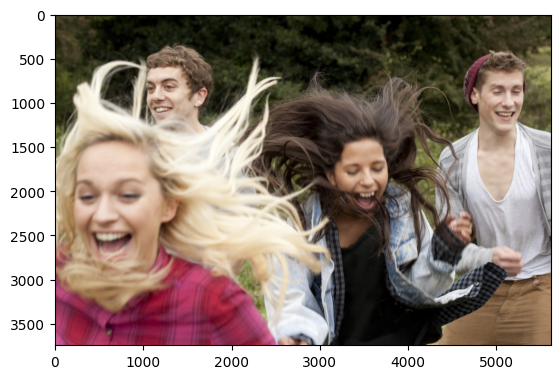

In [40]:
# Show original color
img = cv2.imread('drive/MyDrive/Colab Notebooks/data/test/happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

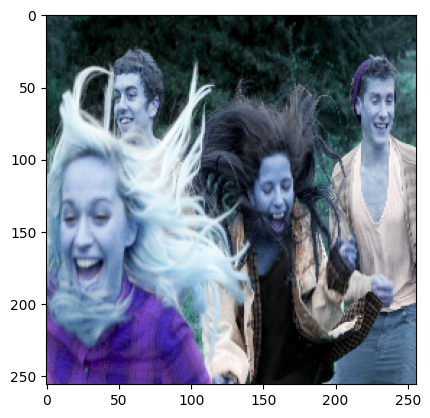

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
resize.shape

TensorShape([256, 256, 3])

In [44]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 103ms/step


In [46]:
yhat

array([[0.00329431]], dtype=float32)

In [47]:
if yhat > 0.5:
  print (f'Predicted class is Sad')
else:
  print (f'Predicted class is Happy')

Predicted class is Happy


#5. Save the model

##5.1 Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('drive/MyDrive/Colab Notebooks/models', 'happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
# We want to use the model we save
new_model = load_model(os.path.join('drive/MyDrive/Colab Notebooks/models', 'happysadmodel.h5'))

In [51]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 183ms/step


In [52]:
if yhatnew > 0.5:
  print (f'Predicted class is Sad')
else:
  print (f'Predicted class is Happy')

Predicted class is Happy
